Formulasi Masalah

Diberikan sebuah dataset Kendaraan yang sudah terlabeli. Masalah yang akan diselesaikan adalah mengcluster data tersebut menjadi k cluster dan memprediksi apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak berdasarkan data pelanggan di dealer.

Eksplorasi Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import data
df_train = pd.read_csv('/content/drive/MyDrive/kendaraan_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/kendaraan_test.csv')
df_train


,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


Explorasi Data dan Preprocessing

In [4]:
# melihat info nilai null
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [5]:
# melihat jumlah pada kolom tertarik
df_train.dropna(inplace=True)
df_train['Tertarik'].value_counts()

0    150270
1     20798
Name: Tertarik, dtype: int64

In [6]:
# melihat jumlah pada kolom tertarik
df_test.dropna(inplace=True)
df_test['Tertarik'].value_counts()

0    41778
1     5861
Name: Tertarik, dtype: int64

In [7]:
# mengubah data kategori menjadi numerikal
df_train = df_train.replace(['Pria','Wanita'],[1,0])
df_train = df_train.replace(['Pernah','Tidak'],[1,0])
df_train = df_train.replace(['< 1 Tahun','1-2 Tahun', '> 2 Tahun'],[0,1,2])
df_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0,30.0,1.0,33.0,1.0,0,0,28029.0,152.0,97.0,0
1,2,1,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0,0
3,4,0,58.0,1.0,48.0,0.0,1,0,2630.0,124.0,63.0,0
5,6,1,21.0,1.0,35.0,1.0,0,0,22735.0,152.0,171.0,0
8,9,0,20.0,1.0,8.0,1.0,0,0,30786.0,160.0,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,0,23.0,1.0,4.0,1.0,0,0,25988.0,152.0,217.0,0
285827,285828,0,21.0,1.0,46.0,1.0,0,0,44686.0,152.0,50.0,0
285828,285829,0,23.0,1.0,50.0,1.0,0,0,49751.0,152.0,226.0,0
285829,285830,1,68.0,1.0,7.0,1.0,1,0,30503.0,124.0,270.0,0


In [8]:
# mengubah data kategori menjadi numerikal
df_test = df_test.replace(['Pria','Wanita'],[1,0])
df_test = df_test.replace(['Pernah','Tidak'],[1,0])
df_test = df_test.replace(['< 1 Tahun','1-2 Tahun', '> 2 Tahun'],[0,1,2])
df_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,1,1,46963,26,145,0
1,1,22,1,47,1,0,0,39624,152,241,0
2,1,24,1,28,1,0,0,110479,152,62,0
3,1,46,1,8,1,1,0,36266,124,34,0
4,1,35,1,23,0,1,1,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,1,61,1,46,0,2,1,31039,124,67,0
47635,1,41,1,15,0,1,1,2630,157,232,0
47636,1,24,1,29,1,0,0,33101,152,211,0
47637,1,59,1,30,0,1,1,37788,26,239,1


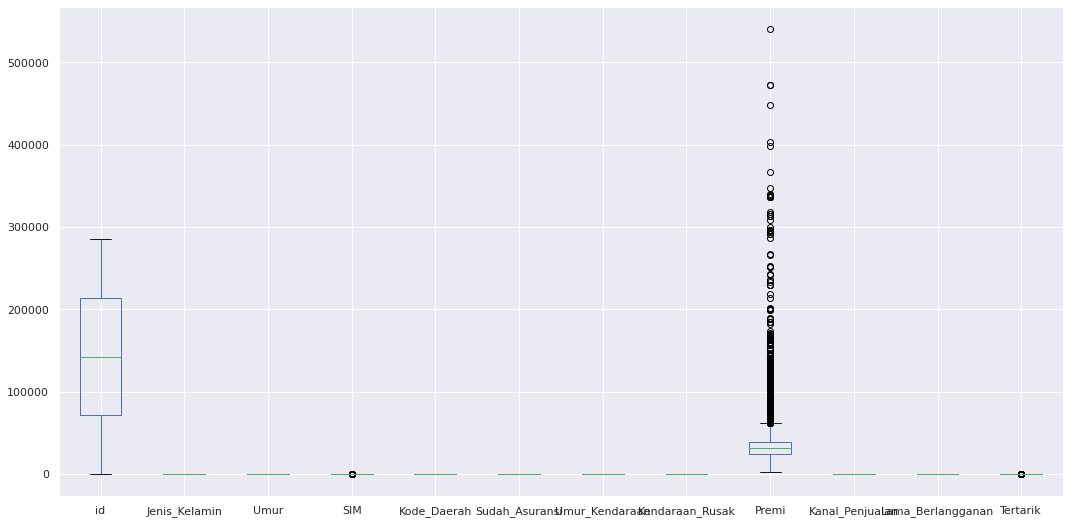

In [9]:
# melihat eksplorasi data train
df_train.plot(kind='box', figsize =(18,9))

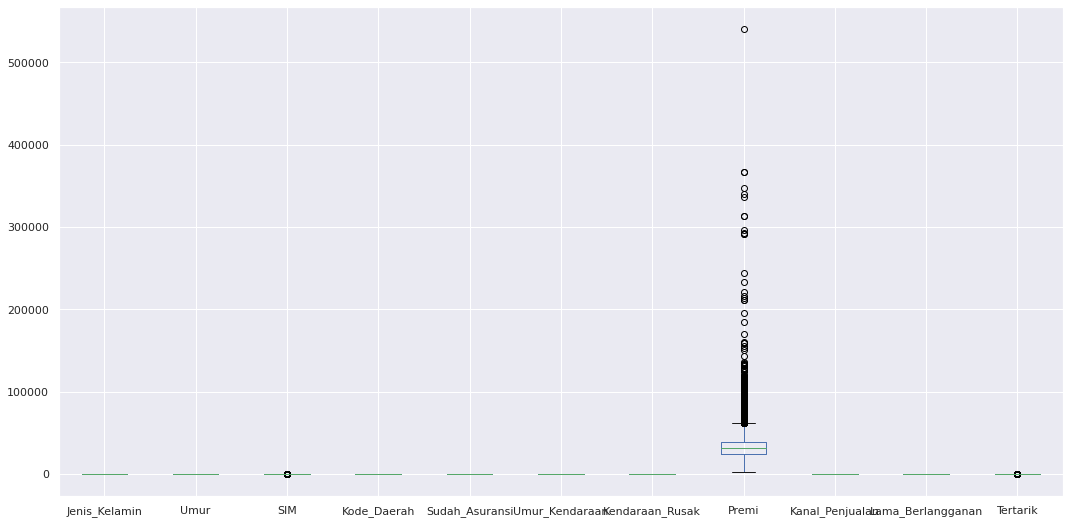

In [10]:
# melihat eksplorasi data test
df_test.plot(kind='box', figsize =(18,9))

In [11]:
# scaling data train
df_train['Premi'] = (df_train['Premi'] - df_train['Premi'].min()) / (df_train['Premi'].max() - df_train['Premi'].min())
df_train['Lama_Berlangganan'] = (df_train['Lama_Berlangganan'] - df_train['Lama_Berlangganan'].min()) / (df_train['Lama_Berlangganan'].max() - df_train['Lama_Berlangganan'].min())
df_train['Umur'] = (df_train['Umur'] - df_train['Umur'].min()) / (df_train['Umur'].max() - df_train['Umur'].min())
df_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0,0.153846,1.0,33.0,1.0,0,0,0.047251,152.0,0.301038,0
1,2,1,0.430769,1.0,39.0,0.0,2,1,0.043104,29.0,0.512111,0
3,4,0,0.584615,1.0,48.0,0.0,1,0,0.000000,124.0,0.183391,0
5,6,1,0.015385,1.0,35.0,1.0,0,0,0.037402,152.0,0.557093,0
8,9,0,0.000000,1.0,8.0,1.0,0,0,0.052380,160.0,0.072664,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,0,0.046154,1.0,4.0,1.0,0,0,0.043454,152.0,0.716263,0
285827,285828,0,0.015385,1.0,46.0,1.0,0,0,0.078239,152.0,0.138408,0
285828,285829,0,0.046154,1.0,50.0,1.0,0,0,0.087661,152.0,0.747405,0
285829,285830,1,0.738462,1.0,7.0,1.0,1,0,0.051853,124.0,0.899654,0


In [12]:
# scaling data test
df_test['Lama_Berlangganan'] = (df_test['Lama_Berlangganan'] - df_test['Lama_Berlangganan'].min()) / (df_test['Lama_Berlangganan'].max() - df_test['Lama_Berlangganan'].min())
df_test['Umur'] = (df_test['Umur'] - df_test['Umur'].min()) / (df_test['Umur'].max() - df_test['Umur'].min())
df_test
# df_train = df_train[1000 :2000]
# tertarik = df_train['Tertarik']
# df_train['Tertarik'].value_counts()
# tertarik

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,0.446154,1,8,0,1,1,46963,26,0.467128,0
1,1,0.030769,1,47,1,0,0,39624,152,0.799308,0
2,1,0.061538,1,28,1,0,0,110479,152,0.179931,0
3,1,0.400000,1,8,1,1,0,36266,124,0.083045,0
4,1,0.230769,1,23,0,1,1,26963,152,0.757785,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,1,0.630769,1,46,0,2,1,31039,124,0.197232,0
47635,1,0.323077,1,15,0,1,1,2630,157,0.768166,0
47636,1,0.061538,1,29,1,0,0,33101,152,0.695502,0
47637,1,0.600000,1,30,0,1,1,37788,26,0.792388,1


In [13]:
#memotong 2000 data tapi dengan membagi pada kolom tertarik 
df_siap = []
a = 0
b = 0
df_train.reset_index(inplace=True)
for i,row in df_train.iterrows():
  if (a < 1000) :
    if row['Tertarik'] == 0:
      df_siap.append(i)
      a += 1
  elif (b < 1000):
    if row['Tertarik'] == 1:
      df_siap.append(i)
      b += 1
  else:
    break
len(df_siap)

2000

In [14]:
# melihat perbandingan data pada kolom tertarik
df_train2 = df_train.reset_index().copy()
df_siap = df_train2.iloc[df_siap,:].copy()
tertarik = df_siap['Tertarik']
df_siap['Tertarik'].value_counts()


1    1000
0    1000
Name: Tertarik, dtype: int64

In [15]:
# mengambil kolom umur dan lama berlangganan pada data train
df_siap = df_siap[['Umur','Lama_Berlangganan']]
df_siap.describe()

,Umur,Lama_Berlangganan
count,2000.000000,2000.000000
mean,0.320700,0.495929
std,0.223005,0.287367
min,0.000000,0.000000
25%,0.107692,0.252595
50%,0.323077,0.498270
75%,0.461538,0.737889
max,0.923077,1.000000


In [16]:
# memotong data test sebanyak 2000
df_test = df_test[:2000]

In [17]:
# mengambil kolom umur dan lama berlangganan
df_test = df_test[['Umur','Lama_Berlangganan']]
df_test.describe()

,Umur,Lama_Berlangganan
count,2000.000000,2000.000000
mean,0.276592,0.495735
std,0.237757,0.294660
min,0.000000,0.000000
25%,0.061538,0.237889
50%,0.215385,0.503460
75%,0.430769,0.757785
max,0.953846,1.000000


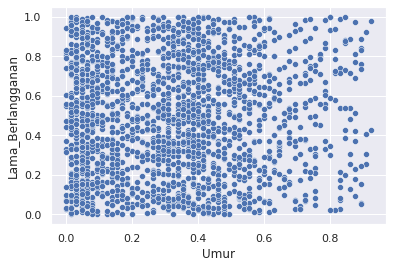

In [18]:
# melihat persebaran data yang diambil
ax = sns.scatterplot(x="Umur", y="Lama_Berlangganan", data=df_siap)

1    1000
0    1000
Name: Tertarik, dtype: int64

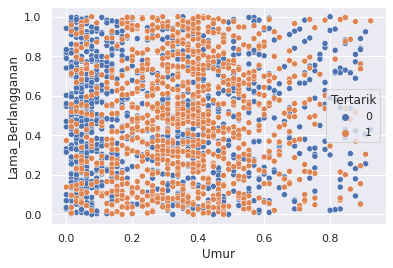

In [19]:
# melihat persebaran data tertarik
temp = df_siap.copy()
temp['Tertarik'] = tertarik

ax = sns.scatterplot(x="Umur", y="Lama_Berlangganan", hue = 'Tertarik', data=temp)
temp['Tertarik'].value_counts()

Modelling

In [20]:
#pembuatan objek k means dengan mengembalikan var cluster 
class K_Means:
    def __init__(self, k=2, tol=0.1, max_iter=100):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}
        self.label = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.clustering = {}

            for i in range(self.k):
                self.clustering[i] = []
                self.label[i] = []
            c = 0
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                clustering = distances.index(min(distances))
                self.clustering[clustering].append(featureset)
                self.label[clustering].append(c)
                c += 1

            prev_centroids = dict(self.centroids)

            for clustering in self.clustering:
                self.centroids[clustering] = np.average(self.clustering[clustering],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    # print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False
                else:
                  break

            # if optimized:
            #     break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        clustering = distances.index(min(distances))
        return clustering

In [21]:
# clustered,centroid = kmeansku(df_train2.values.tolist(),4)
df_siap

,Umur,Lama_Berlangganan
0,0.153846,0.301038
1,0.430769,0.512111
2,0.584615,0.183391
3,0.015385,0.557093
4,0.000000,0.072664
...,...,...
8914,0.338462,0.961938
8924,0.353846,0.505190
8932,0.292308,0.373702
8948,0.276923,0.373702


In [22]:
df_test

,Umur,Lama_Berlangganan
0,0.446154,0.467128
1,0.030769,0.799308
2,0.061538,0.179931
3,0.400000,0.083045
4,0.230769,0.757785
...,...,...
1995,0.030769,0.930796
1996,0.307692,0.301038
1997,0.446154,0.809689
1998,0.738462,0.515571


In [23]:
# #export data frame ke file csv 
# df_siap.to_csv('train.csv', index=False)
# df_test.to_csv('test.csv', index=False)

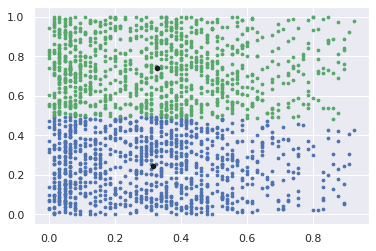

In [24]:
#menampilkan plotting cluster dari data frame df_siap
model = K_Means()
model.fit(df_siap.values)
colors = ['b','g']

for clustering in model.clustering:
    color = colors[clustering]
    for featureset in model.clustering[clustering]:
        # print(featureset)
        plt.scatter(featureset[0], featureset[1], marker=".", color=color, s=30, linewidths=1)

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker=".", color="k", s=50, linewidths=2)

plt.show()

In [25]:
#melihat banyaknya var tertarik yang bernilai 1 pada tiap cluster 
temp.reset_index()
for i,l in model.label.items():
  display(temp.iloc[l]['Tertarik'].value_counts())

1    499
0    488
Name: Tertarik, dtype: int64

0    512
1    501
Name: Tertarik, dtype: int64

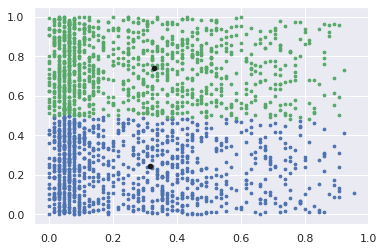

In [26]:
#menampilkan plotting cluster dari data frame df_test
predictions = []
for i in range(len(df_test)) :
  predictions.append(model.predict(df_test.values[i]))

colors = ['b','g']

for i in range(len(df_test)):
    color = colors[predictions[i]]
    featureset = df_test.values[i]
    # print(featureset)
    plt.scatter(featureset[0], featureset[1], marker=".", color=color, s=30, linewidths=1)

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker=".", color="k", s=50, linewidths=2)

plt.show()

In [27]:
#melihat banyaknya var tertarik yang bernilai 1 pada 2 cluster 
df_test['Tertarik'] = predictions
df_test['Tertarik'].value_counts()

1    1022
0     978
Name: Tertarik, dtype: int64

Metode Elbow

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


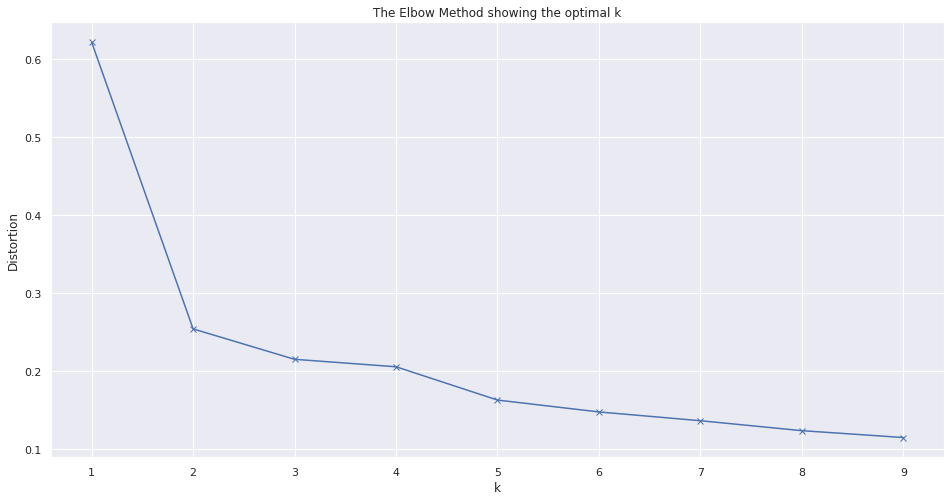

In [28]:
# menghitung nilai elbow tiap k dengan menyimpannya pada distortions dan memplotting grafiknya
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
mapping = {}
K = range(1,10)
for k in K:
    kmeanModel = K_Means(k=k)
    kmeanModel.fit(df_test.values)

    distortions.append(sum(np.min(cdist(df_test.values, [i[1].tolist() for i in kmeanModel.centroids.items()],'euclidean'), axis = 1)) / df_test.shape[0])

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Siluet Koef

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


For n_clusters = 2 The average silhouette_score is : 0.7099797246906989


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


For n_clusters = 3 The average silhouette_score is : 0.5851645722547395


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


For n_clusters = 4 The average silhouette_score is : 0.5595105166059532


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


For n_clusters = 5 The average silhouette_score is : 0.44904262161622965


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


For n_clusters = 6 The average silhouette_score is : 0.41564553080047684


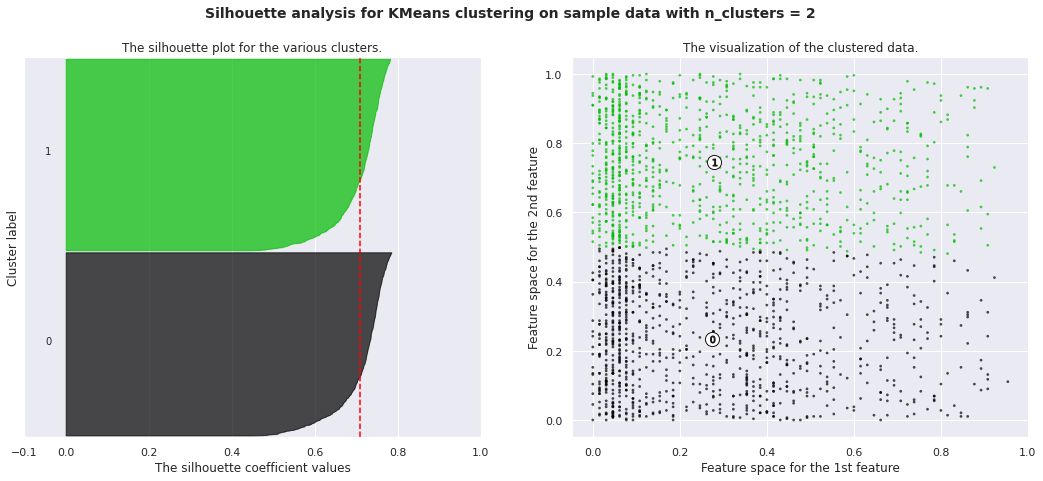

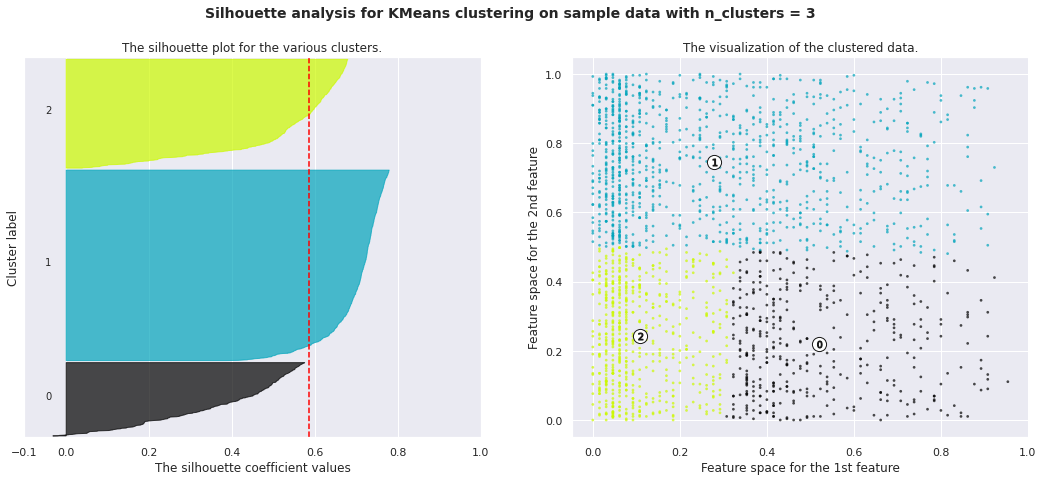

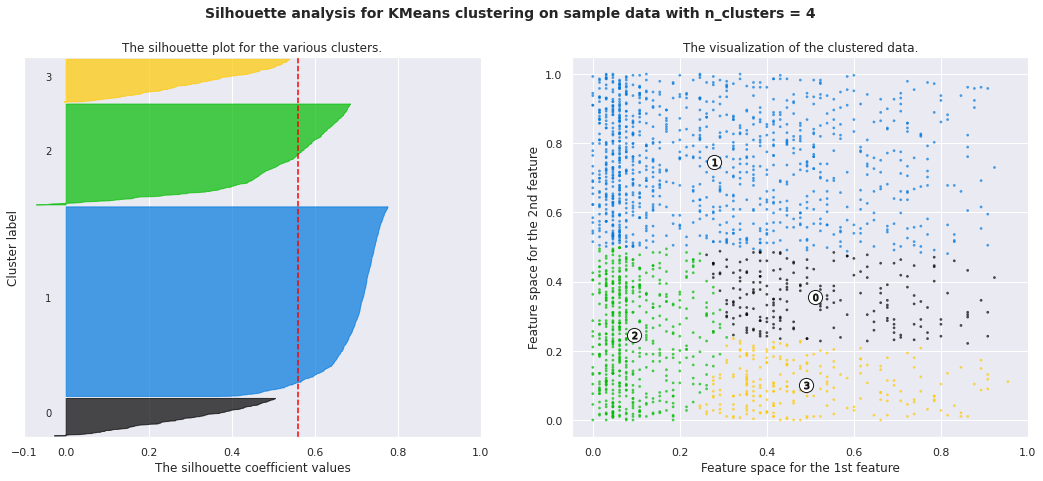

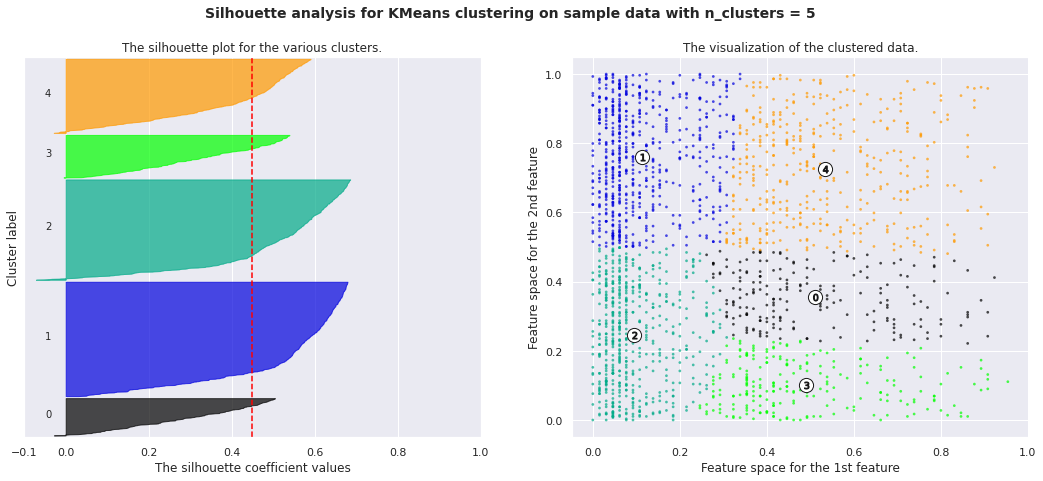

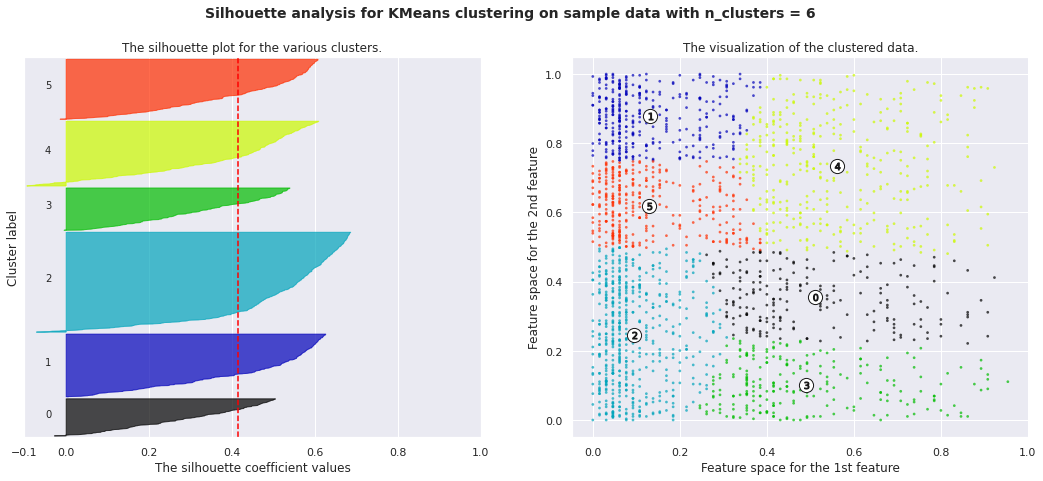

In [29]:
# untuk mencari silhouette koefisien score dan memplotting cluster tiap
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    cluster_labels=[]
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_test) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = K_Means(k=n_clusters)
    clusterer.fit(df_test.values)
    for i in range(len(df_test)):
      cluster_labels.append(clusterer.predict(df_test.values[i]))
    cluster_labels=np.array(cluster_labels)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_test.values, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_test.values, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_test.values[:, 0], df_test.values[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers =[list(i) for i in clusterer.centroids.values()]
    # Draw white circles at cluster centers
    ax2.scatter([i[0] for i in centers], [i[1] for i in centers], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()